In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
# Load the data from the assets folder

rain_data = pd.read_csv('../assets/rain_data.csv')
print(f'Shape of the data: {rain_data.shape}')
rain_data.head()

Shape of the data: (67021, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
1,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
3,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
4,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes


# Preprocessing

In [4]:
print(rain_data.dtypes)
rain_data.describe()

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,65864.000000,65940.000000,64271.000000,37591.000000,34831.000000,61576.000000,65971.000000,65328.000000,65257.000000,64388.000000,59750.000000,59761.000000,41303.000000,40071.000000,65689.000000,64811.000000
mean,12.552091,22.480866,3.669512,5.122383,6.514499,42.142150,14.634764,19.187194,72.074781,57.521433,1016.524147,1014.237604,5.053870,5.184148,16.888700,20.822340
std,6.371143,7.108686,10.981571,3.950017,3.932475,14.638665,9.227585,9.171806,18.481003,21.741282,7.343975,7.283068,2.778949,2.620094,6.427827,6.931696
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,8.000000,17.200000,0.000000,2.400000,3.200000,31.000000,7.000000,13.000000,61.000000,42.000000,1011.700000,1009.300000,2.000000,3.000000,12.200000,15.800000
50%,12.300000,21.800000,0.000000,4.400000,6.800000,41.000000,13.000000,19.000000,74.000000,58.000000,1016.500000,1014.200000,6.000000,6.000000,16.500000,20.100000
75%,17.200000,27.400000,2.200000,7.000000,9.900000,50.000000,20.000000,24.000000,87.000000,73.000000,1021.500000,1019.200000,7.000000,7.000000,21.400000,25.500000
max,33.900000,47.300000,371.000000,77.300000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.300000,1038.500000,8.000000,8.000000,39.000000,46.700000


In [5]:
# Convert 
"""rain_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
rain_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)"""

"rain_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)\nrain_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)"

# Missing values

,missing_values,percent_missing %,data type
Date,0,0.000000,object
Location,0,0.000000,object
MinTemp,1157,1.726325,float64
MaxTemp,1081,1.612927,float64
Rainfall,2750,4.103192,float64
Evaporation,29430,43.911610,float64
Sunshine,32190,48.029722,float64
WindGustDir,5487,8.186986,object
WindGustSpeed,5445,8.124319,float64
WindDir9am,4751,7.088823,object


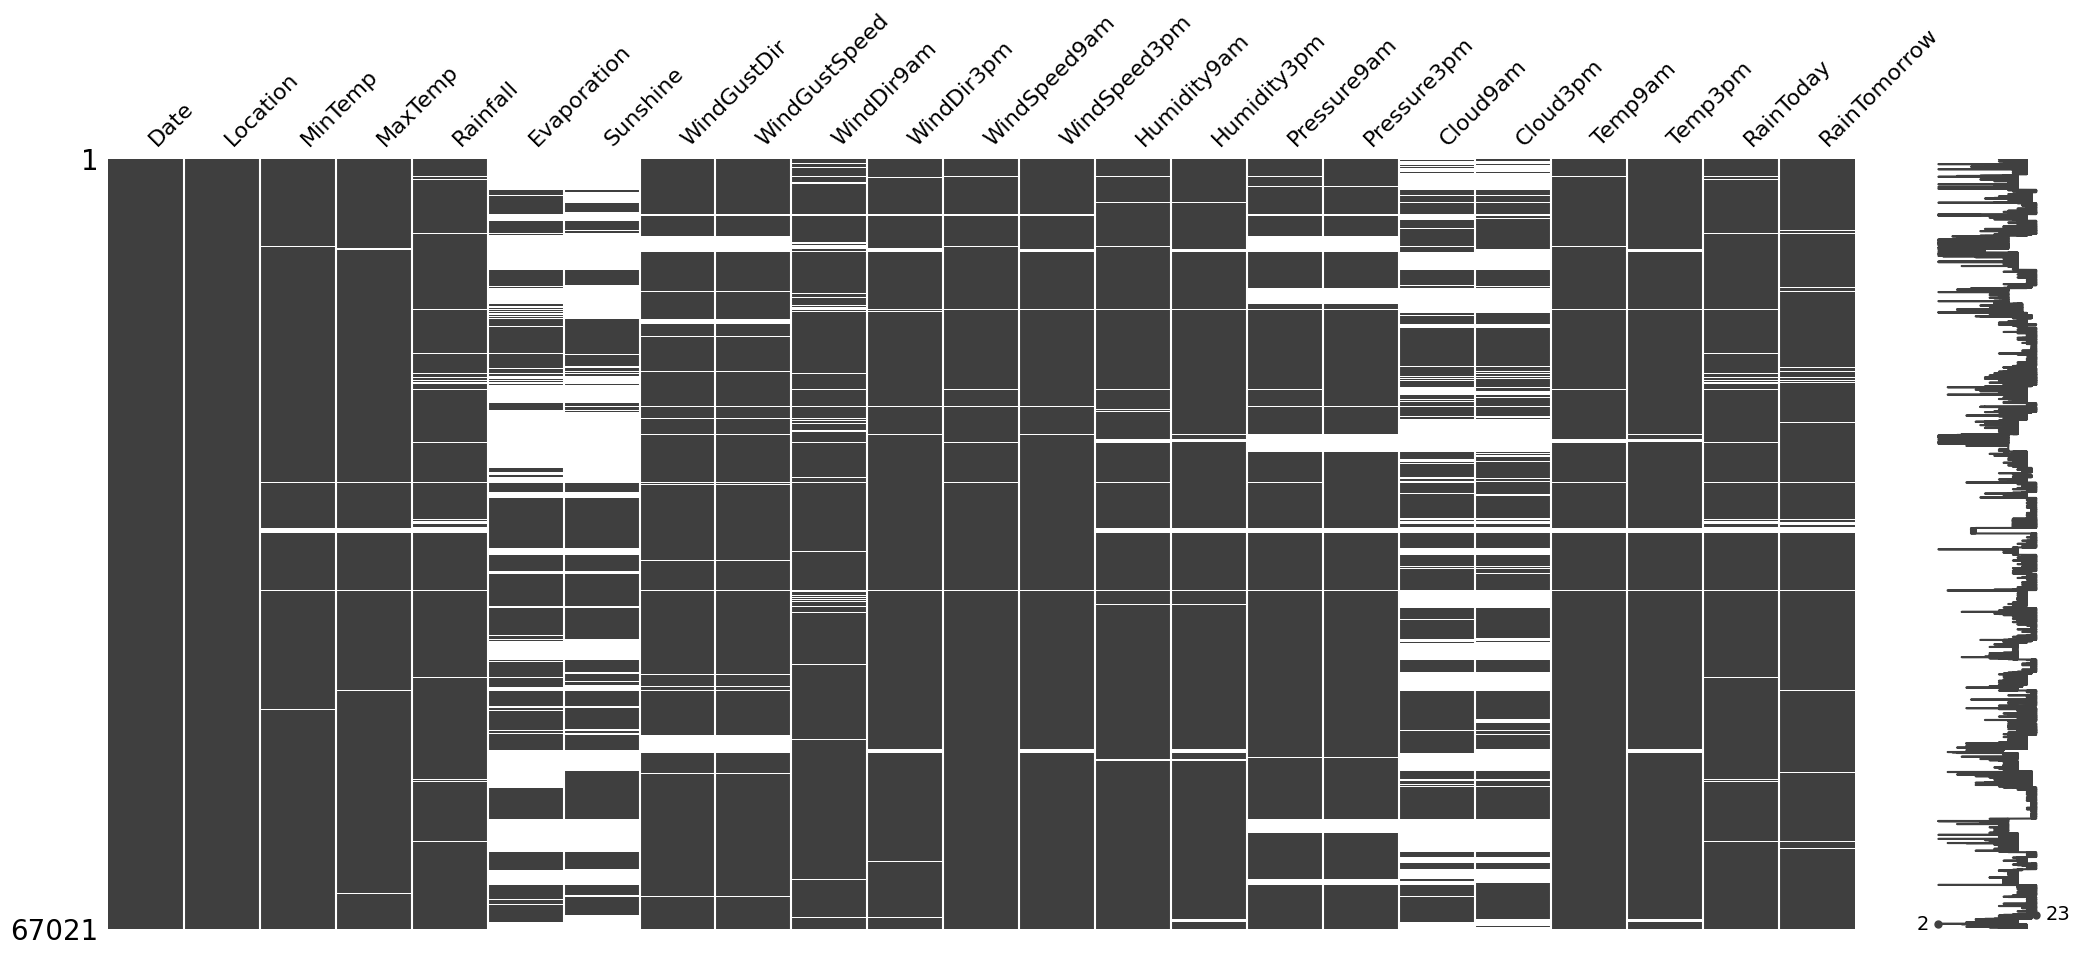

In [6]:
import missingno as msno

# Visualize the missing values as a matrix

msno.matrix(rain_data)

def create_missing_data_frame():
    # create a table with data missing 
    missing_values=rain_data.isnull().sum() # missing values

    percent_missing = rain_data.isnull().sum()/rain_data.shape[0]*100 # missing value %

    value = {
        'missing_values ':missing_values,
        'percent_missing %':percent_missing , 
        'data type' : rain_data.dtypes
    }
    frame=pd.DataFrame(value)
    return frame

missing_data=create_missing_data_frame()
missing_data

Shape of the data: (32720, 23)
               missing_values   percent_missing % data type
Date                         0           0.000000    object
Location                     0           0.000000    object
MinTemp                    583           1.781785   float64
MaxTemp                    576           1.760391   float64
Rainfall                   838           2.561125   float64
Evaporation                  0           0.000000   float64
Sunshine                     0           0.000000   float64
WindGustDir               2265           6.922372    object
WindGustSpeed             2251           6.879584   float64
WindDir9am                1134           3.465770    object
WindDir3pm                 403           1.231663    object
WindSpeed9am               150           0.458435   float64
WindSpeed3pm               262           0.800733   float64
Humidity9am                737           2.252445   float64
Humidity3pm                832           2.542787   float64
Pressure9

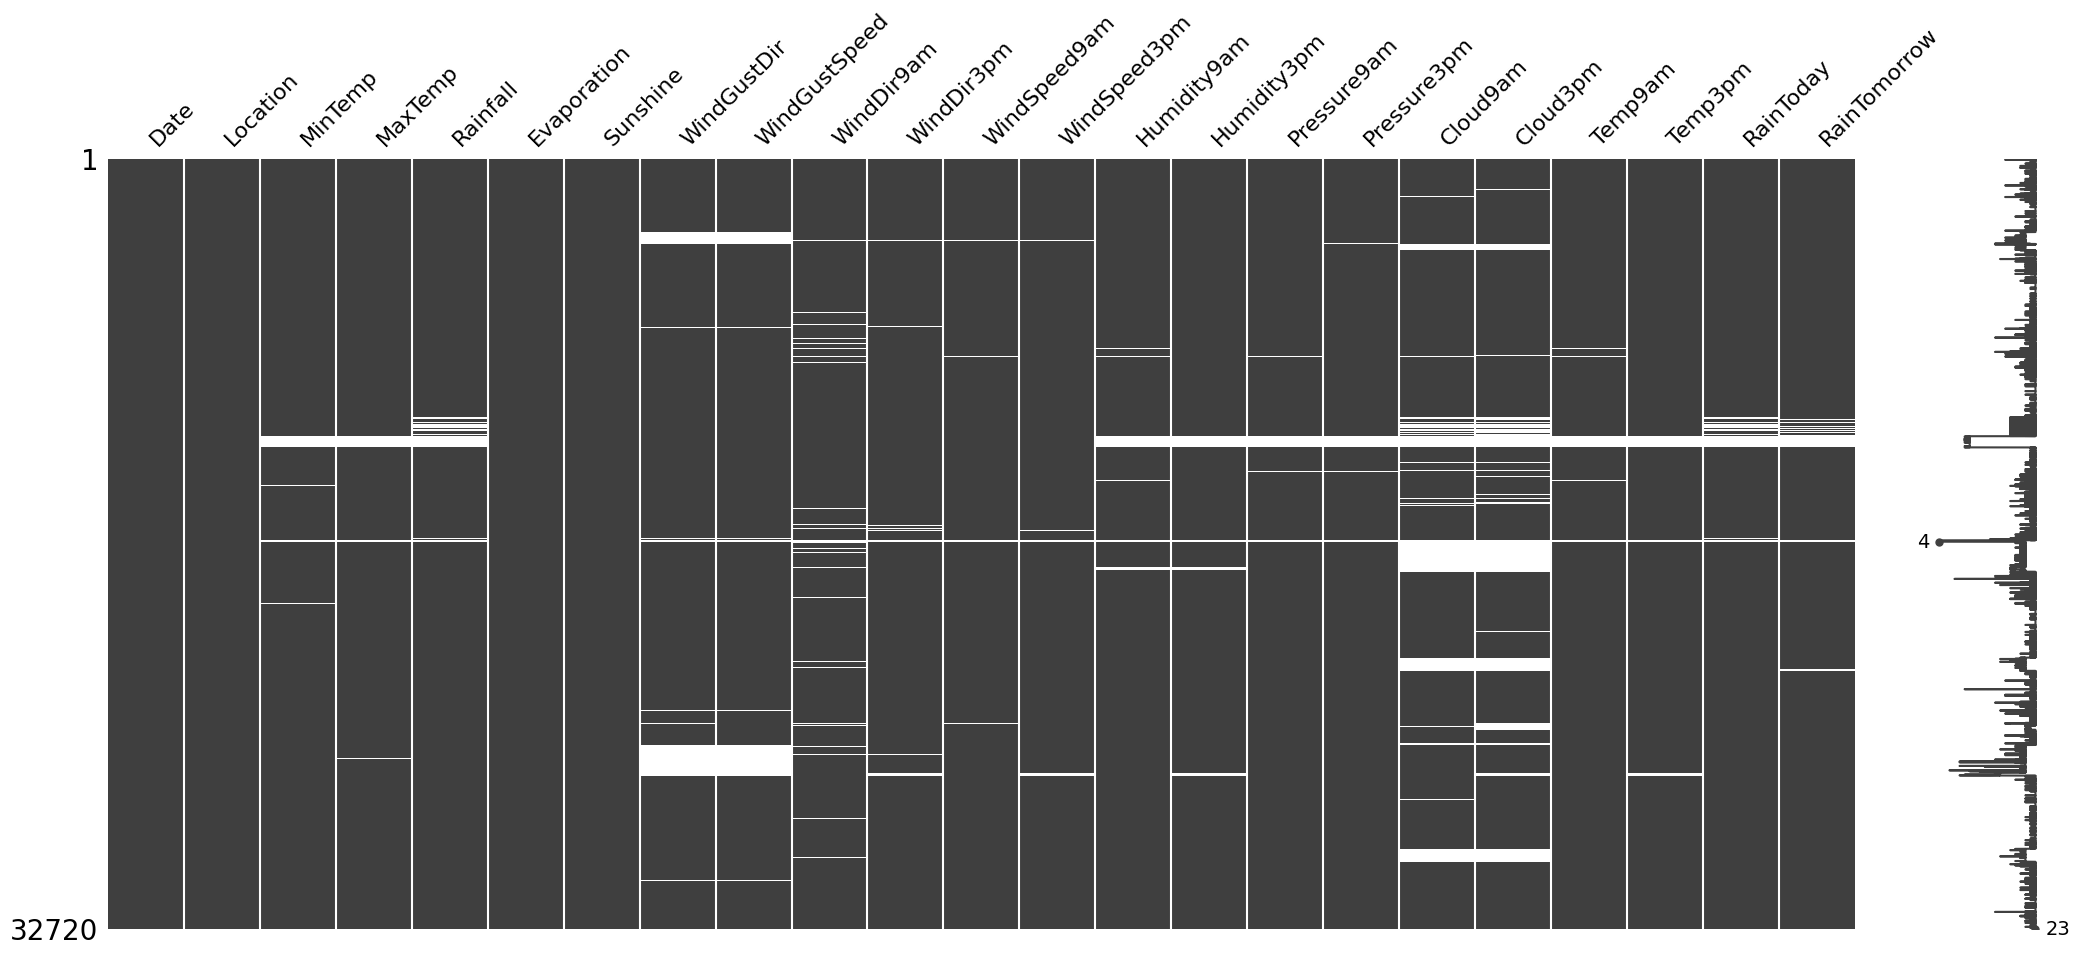

In [7]:
# Delete the rows that have missing values in 'Evaporation' and 'Sunshine'

rain_data.dropna(subset=['Evaporation', 'Sunshine'], inplace=True)
msno.matrix(rain_data)
missing_data=create_missing_data_frame()
missing_data

print(f'Shape of the data: {rain_data.shape}')
print(create_missing_data_frame())


# Impute the rest of values

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_dataset(data):
    # Separa las columnas numéricas y categóricas
    df = data.copy()
    categorical_cols = df.select_dtypes(include=['object']).columns
    numerical_cols = df.select_dtypes(exclude=['object']).columns
    
    # Imputación para variables numéricas utilizando MICE con KNN
    mice_imputer = IterativeImputer(estimator=KNeighborsRegressor(), initial_strategy='median', max_iter=20, tol=0.01, random_state=42)
    df[numerical_cols] = mice_imputer.fit_transform(df[numerical_cols])
    
    # Redondear Cloud9am y Cloud3pm después de la imputación
    cloud_cols = ['Cloud9am', 'Cloud3pm']
    for col in cloud_cols:
        df[col] = df[col].apply(lambda x: min(8, max(0, round(x))))
    
    # Imputación para variables categóricas utilizando Random Forest
    for column in categorical_cols:
        rf_imputer = RandomForestClassifier(n_estimators=100, random_state=42)
        non_na_data = df[df[column].notna()]
        na_data = df[df[column].isna()]
        if na_data.empty:
            continue
        rf_imputer.fit(non_na_data.drop(columns=categorical_cols), non_na_data[column])
        imputed_values = rf_imputer.predict(na_data.drop(columns=categorical_cols))
        df.loc[df[column].isna(), column] = imputed_values
    
    return df

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score

# Function to randomly hide data in the DataFrame

def hide_data(df, hide_ratio=0.1):
    """
    Randomly hides data in the DataFrame based on the specified ratio,
    except for the specified columns: 'Sunshine', 'Evaporation', 'Date', and 'Location'.
    """
    df_copy = df.copy()
    # Create a True/False mask for the entire DataFrame
    mask = np.random.rand(*df.shape) < hide_ratio

    # Convert the numpy array mask to a DataFrame to manipulate columns by name
    mask_df = pd.DataFrame(mask, columns=df.columns, index=df.index)

    # Exclude specified columns from the mask by setting them to False
    excluded_columns = ['Sunshine', 'Evaporation', 'Date', 'Location']
    mask_df[excluded_columns] = False

    # Apply the mask to df_copy to hide the data
    df_copy[mask_df] = np.nan
    original_data = df.where(mask_df)
    
    return df_copy, original_data

def evaluate_imputation(df, hide_ratio=0.1):
    df_hidden, original_data = hide_data(df, hide_ratio)
    df_imputed = impute_dataset(df_hidden)
    
    metrics_num = {}
    metrics_cat = {}

    for column in df.columns:
        if column in ['Sunshine', 'Evaporation', 'Date', 'Location']:
            continue
        if df[column].dtype in ['float64', 'int64']:
            valid_index = original_data[column].dropna().index.intersection(df_imputed.index)
            if not valid_index.empty:
                mse = mean_squared_error(original_data[column].loc[valid_index], df_imputed[column].loc[valid_index])
                r2 = r2_score(original_data[column].loc[valid_index], df_imputed[column].loc[valid_index])
                # Storing metrics for each numerical variable
                metrics_num[column] = {
                    'MSE': mse,
                    'R2': r2,
                }
        elif df[column].dtype == 'object':
            valid_index = original_data[column].dropna().index.intersection(df_imputed.index)
            if not valid_index.empty:
                accuracy = accuracy_score(original_data[column].loc[valid_index], df_imputed[column].loc[valid_index])
                f1 = f1_score(original_data[column].loc[valid_index], df_imputed[column].loc[valid_index], average='weighted')
                # Storing metrics for each categorical variable
                metrics_cat[column] = {
                    'Accuracy': accuracy,
                    'F1 Score': f1
                }
    
    return metrics_num, metrics_cat

# Evaluate the imputation performance
evaluate_imputation_dataset = rain_data.copy()
metrics_num, metrics_cat = evaluate_imputation(evaluate_imputation_dataset, hide_ratio=0.1)

# Convert the results to DataFrames for better visualization
df_metrics_num = pd.DataFrame(metrics_num).T
df_metrics_cat = pd.DataFrame(metrics_cat).T

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## PRINT THE IMPUTATION RESULTS

In [10]:
# Print the results
print("Numerical Variables Imputation Metrics:")
df_metrics_num

Numerical Variables Imputation Metrics:


,MSE,R2
MinTemp,6.458956,0.842527
MaxTemp,3.722595,0.922711
Rainfall,56.587200,0.159574
WindGustSpeed,89.751000,0.569790
WindSpeed9am,52.147300,0.339993
WindSpeed3pm,43.639937,0.470733
Humidity9am,121.458646,0.616138
Humidity3pm,134.479366,0.688482
Pressure9am,11.561872,0.789769
Pressure3pm,11.954405,0.778616


In [11]:
print("Categorical Variables Imputation Metrics:")
df_metrics_cat

Categorical Variables Imputation Metrics:


,Accuracy,F1 Score
WindGustDir,0.192892,0.186181
WindDir9am,0.220996,0.207322
WindDir3pm,0.215625,0.210445
RainToday,0.968924,0.969033
RainTomorrow,0.809293,0.809297


# IMPUTE THE ORIGINAL DATASET

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<Axes: >

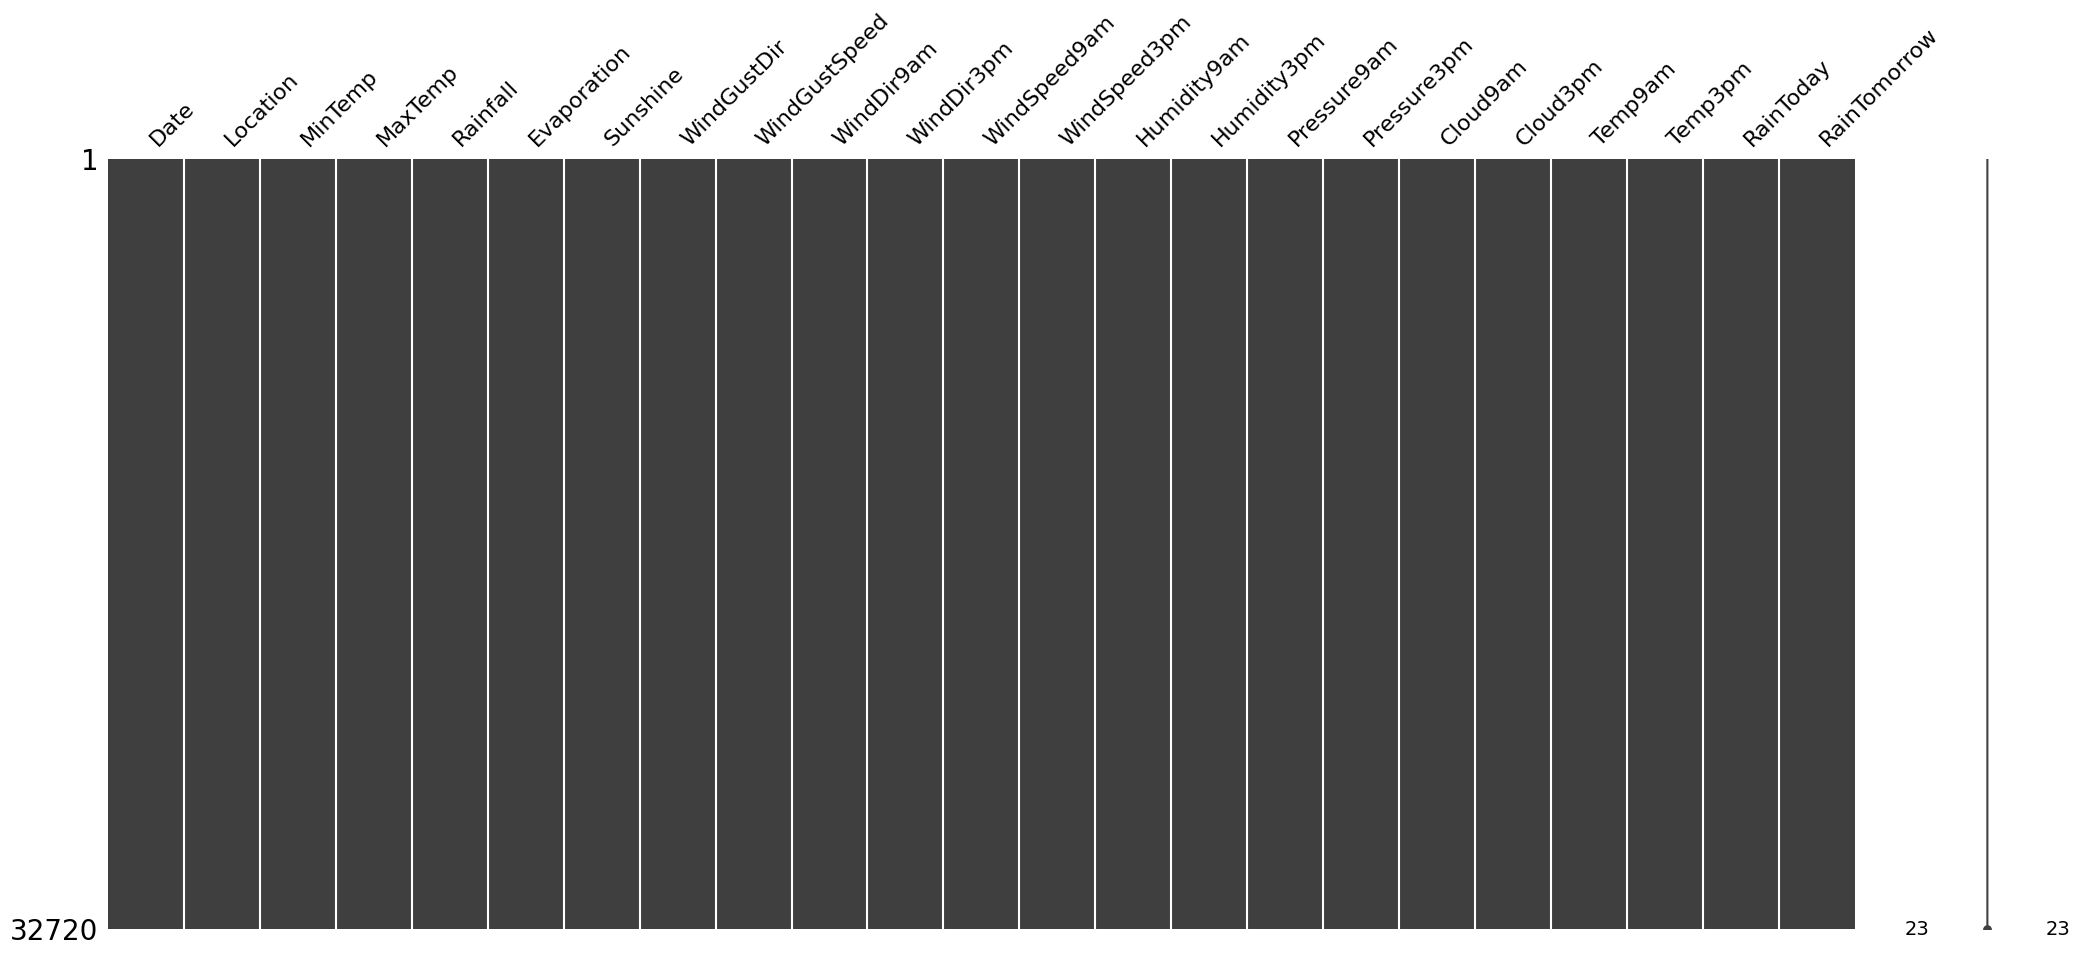

In [12]:
imputed_rain_data = impute_dataset(rain_data)

# Visualize that there are no missing values
msno.matrix(imputed_rain_data)

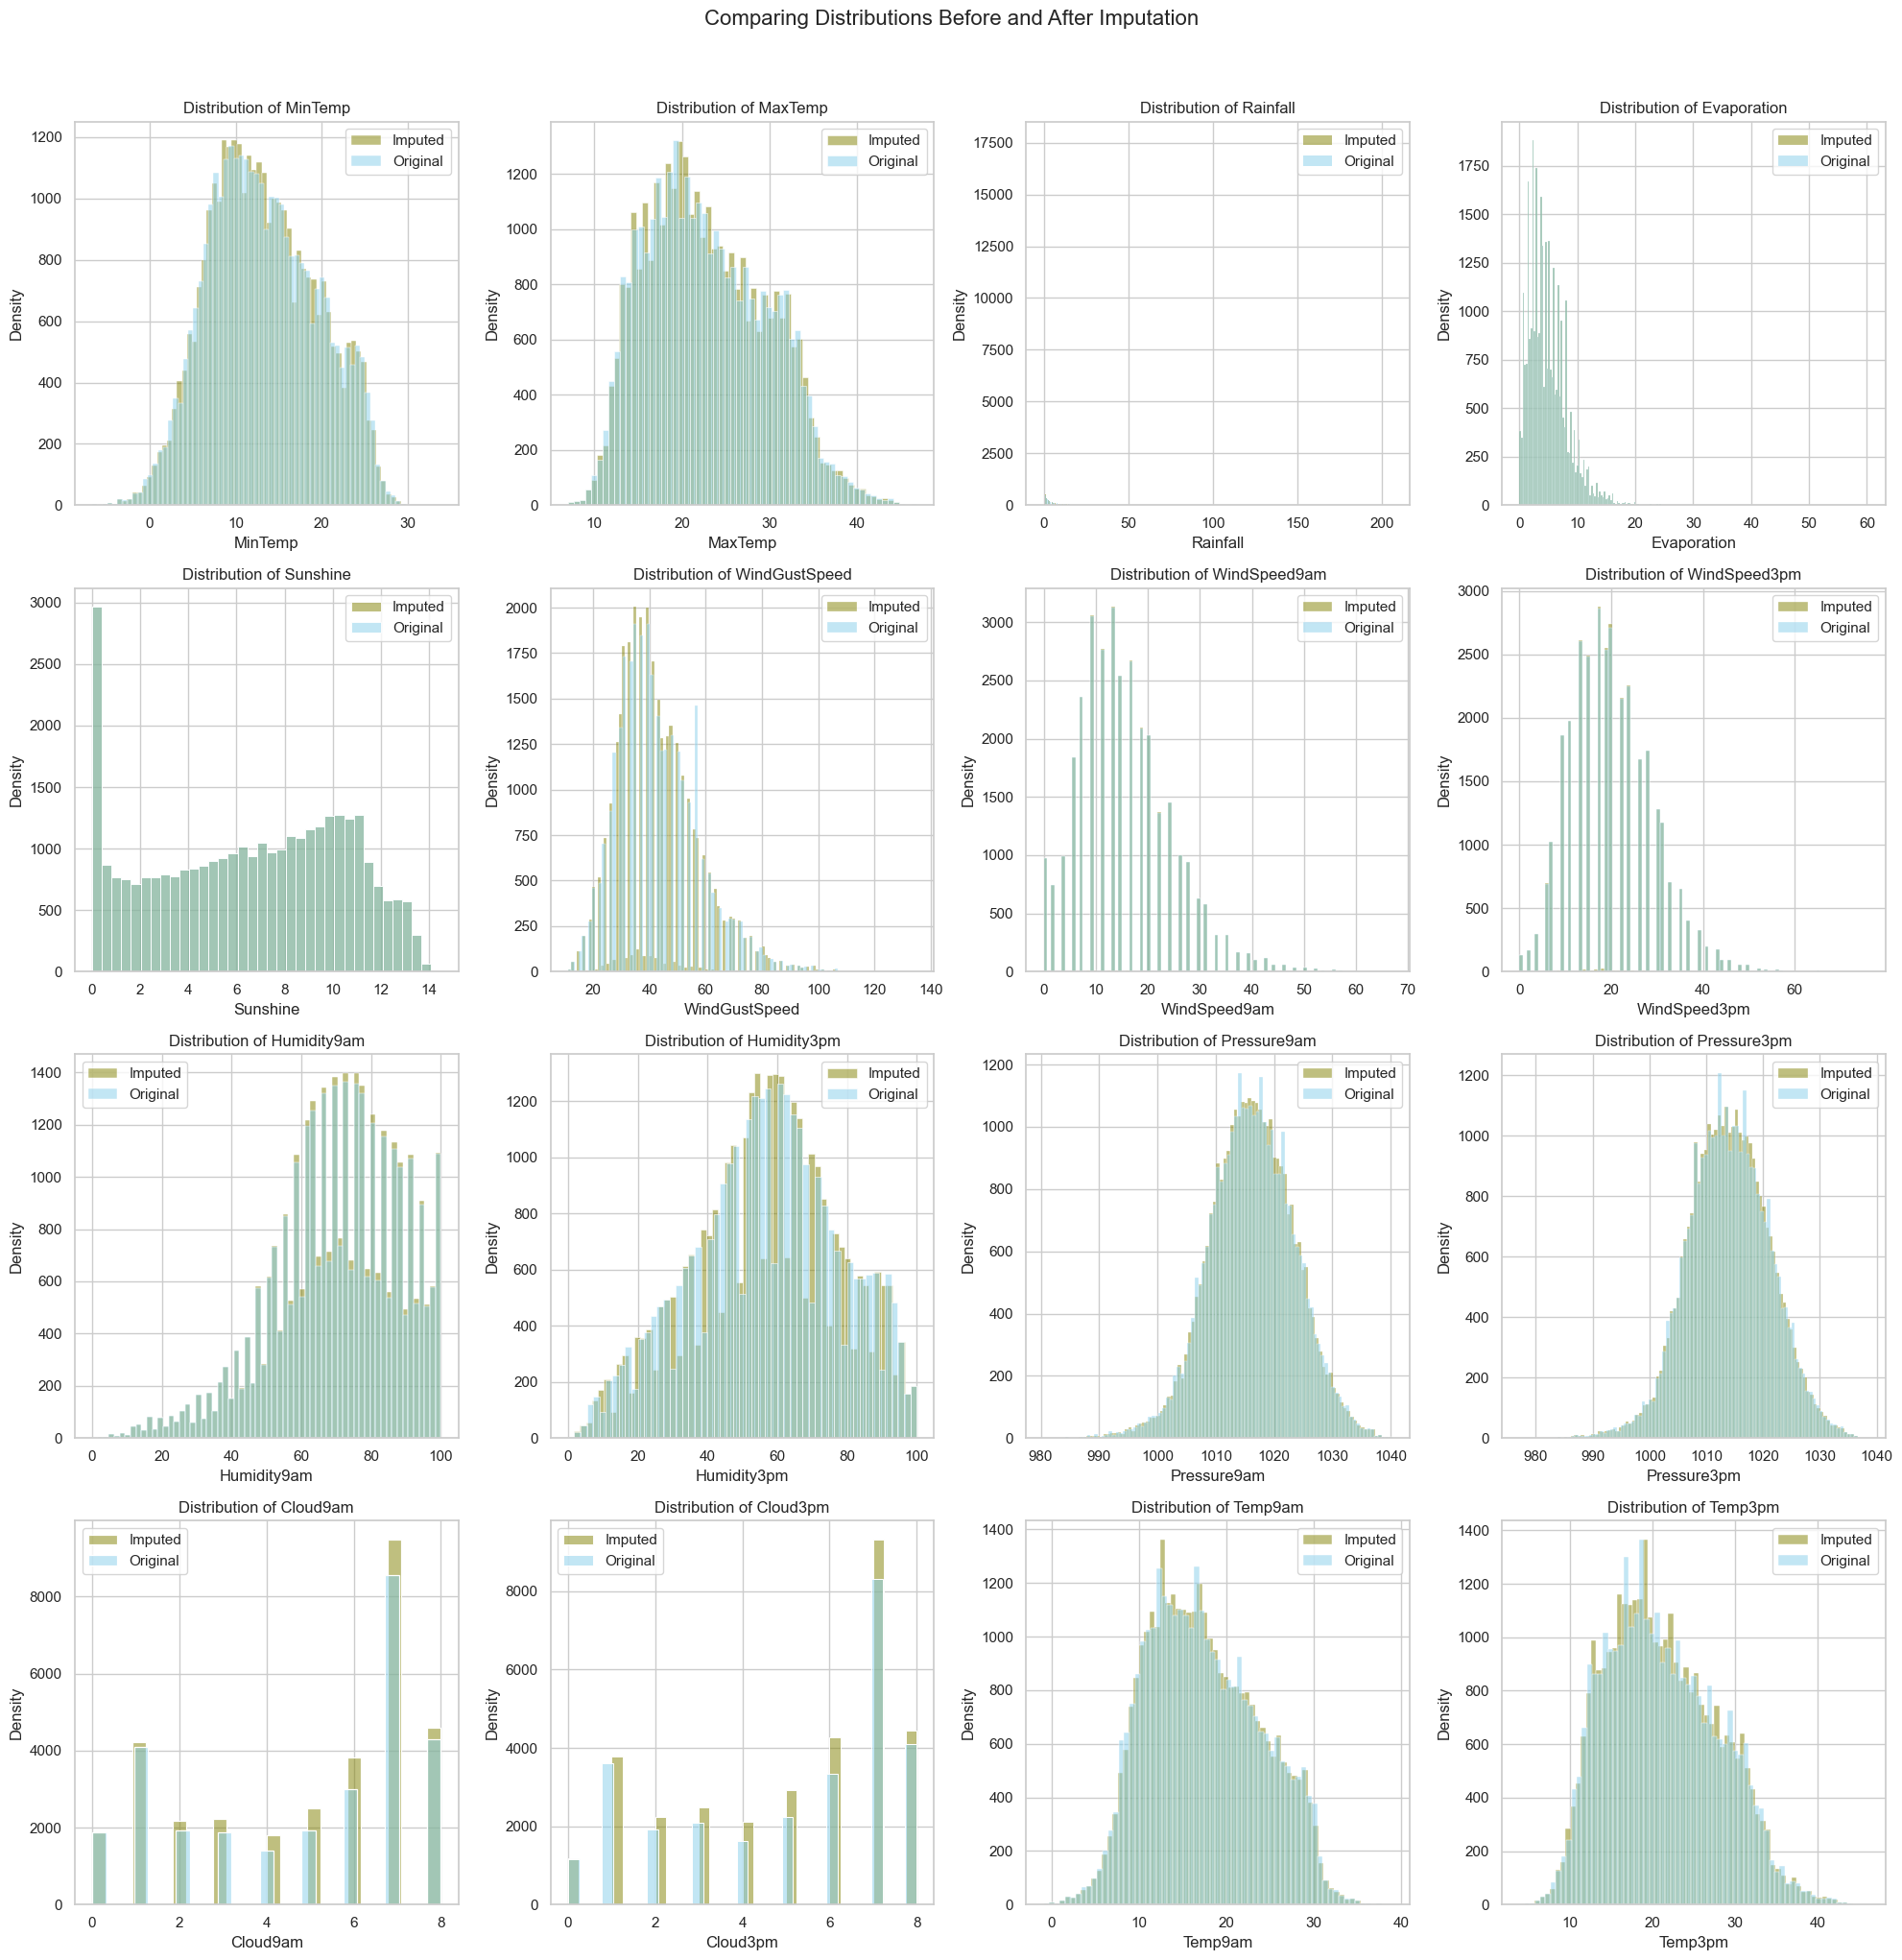

In [13]:
# Configuración estética de seaborn para los gráficos
sns.set(style="whitegrid")


def compare_distributions(original_df, imputed_df):
    numerical_cols = original_df.select_dtypes(include=['int64', 'float64']).columns
    n_cols = len(numerical_cols)
    n_rows = max(n_cols // 4, 1)  # Asegúrate de tener al menos 1 fila
    fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(20, 5 * n_rows))  # Ajustar el tamaño de la figura
    fig.suptitle('Comparing Distributions Before and After Imputation', fontsize=16, y=1.02)

    axes = axes.flatten()  # Aplanar el arreglo de ejes para facilitar su manejo en un bucle

    # Iterar sobre cada columna y crear los gráficos
    for ax, column in zip(axes, numerical_cols):
        # Si dibujamos primero el imputado y luego el original, aseguramos que ambos sean visibles
        sns.histplot(imputed_df[column], kde=False, color="olive", alpha=0.5, label='Imputed', ax=ax)
        sns.histplot(original_df[column], kde=False, color="skyblue", alpha=0.5, label='Original', ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')
        ax.legend()
    
    # Ocultar ejes no utilizados si el número de variables no llena la última fila
    for i in range(len(numerical_cols), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Llamada a la función con tus DataFrames
compare_distributions(rain_data, imputed_rain_data)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score



# Separación de los features y el target
X = imputed_rain_data.drop('RainTomorrow', axis=1)
y = imputed_rain_data['RainTomorrow']

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selección de columnas numéricas y categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Creación del preprocesador con StandardScaler y OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Modelos a evaluar
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Entrenamiento y evaluación de cada modelo
for name, model in models.items():
    # Crear el pipeline de preprocesamiento y modelado
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    # Entrenamiento del modelo
    pipeline.fit(X_train, y_train)
    
    # Predicciones
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]  # Solo necesario para ROC AUC
    
    # Métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"{name}:\n Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}")



Logistic Regression:
 Accuracy: 0.79, ROC AUC: 0.88
Random Forest:
 Accuracy: 0.80, ROC AUC: 0.88
Gradient Boosting:
 Accuracy: 0.79, ROC AUC: 0.88


In [15]:
# Train neural network

from sklearn.neural_network import MLPClassifier

# Modelos a evaluar
models = {
    'MLP Classifier': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Entrenamiento y evaluación de cada modelo

for name, model in models.items():
    # Crear el pipeline de preprocesamiento y modelado
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    # Entrenamiento del modelo
    pipeline.fit(X_train, y_train)
    
    # Predicciones
    y_pred = pipeline.predict(X_test)
    
    # Métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name}:\n Accuracy: {accuracy:.2f}")

MLP Classifier:
 Accuracy: 0.79
